<a href="https://colab.research.google.com/github/MasahiroAraki/MLCourse/blob/master/07_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 第7章 サポートベクトルマシン

## 7.1 マージンを最大とする識別面を求める

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
from sklearn.datasets import make_classification
from sklearn.svm import SVC

乱数を使って、データを生成
* 2クラス
* 特徴ベクトルは2次元（冗長な次元はなし）
* 各クラスにつき一つの正規分布からデータを生成
* ランダムにクラスを反転させることは行わない
* クラスが適度に分かれているように調整

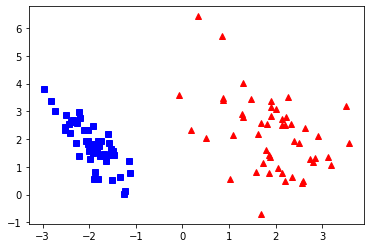

In [10]:
X, y = make_classification(n_features=2, n_redundant=0, n_clusters_per_class=1, flip_y=0, class_sep=2.0, random_state=2)
plt.plot(X[y==0,0], X[y==0,1],"bs")
plt.plot(X[y==1,0], X[y==1,1],"r^")

線形カーネル(linear)は、この特徴空間でマージン最大化を行うものです。

In [20]:
clf = SVC(kernel='linear')
clf.fit(X, y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

識別面を表示します。

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


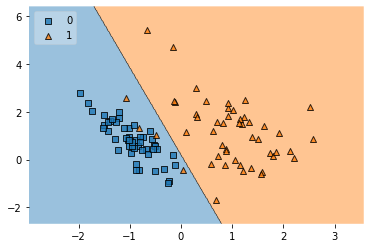

In [21]:
plot_decision_regions(X=X, y=y, clf=clf, legend=2)

## 7.2 ソフトマージンによる誤識別データの吸収

クラスの分離度(class_sep)の値を少し小さくして、やや難しいデータを作成し、同様の手順でSVMによる識別を行います。

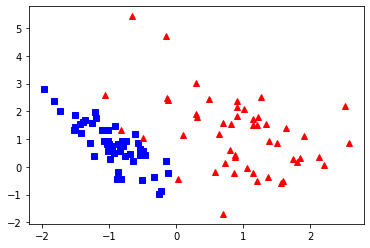

In [22]:
X, y = make_classification(n_features=2, n_redundant=0, n_clusters_per_class=1, flip_y=0, class_sep=1.0, random_state=2)
plt.plot(X[y==0,0], X[y==0,1],"bs")
plt.plot(X[y==1,0], X[y==1,1],"r^")

In [24]:
clf = SVC(kernel='linear', C=1)
clf.fit(X, y)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


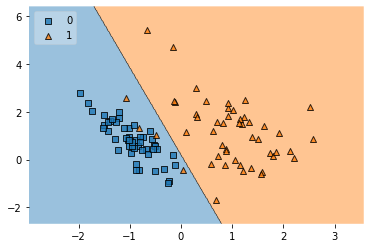

In [25]:
plot_decision_regions(X=X, y=y, clf=clf, legend=2)

## 7.3 カーネル関数を用いたSVM

非線形識別面での識別を行うので、さらにデータを複雑なものにします。

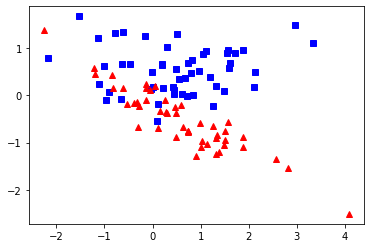

In [66]:
X, y = make_classification(n_features=2, n_redundant=0, n_clusters_per_class=1, class_sep=0.5, random_state=3)
plt.plot(X[y==0,0], X[y==0,1],"bs")
plt.plot(X[y==1,0], X[y==1,1],"r^")

多項式カーネル

In [67]:
clf = SVC(kernel='poly', degree=3, C=1)
clf.fit(X, y)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


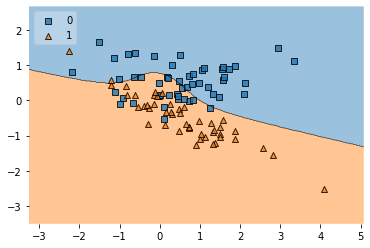

In [68]:
plot_decision_regions(X=X, y=y, clf=clf, legend=2)

RBFカーネル

In [69]:
clf = SVC(kernel='rbf', gamma=1, C=1)
clf.fit(X, y)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


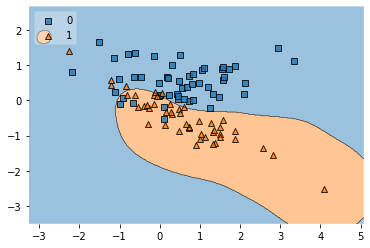

In [70]:
plot_decision_regions(X=X, y=y, clf=clf, legend=2)

## 7.4 ハイパーパラメータのグリッドサーチ

In [0]:
from sklearn.model_selection import GridSearchCV

「スラック変数の重みC」と「多項式カーネルの次数degree」の組み合わせでGridSearchを行います。

パラメータとして多項式カーネルを与えて、サポートベクトルマシン[SVC](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)のインスタンスsvcを作成します。

In [72]:
svc = SVC(kernel='poly')
svc

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

GridSearchを行います。「スラック変数の重みC」と「多項式カーネルの次数degree」の組み合わせで、リストを値とするディクショナリの配列param\_gridを作成します。

In [0]:
param_grid = [
  {'C': [0.1, 1, 10, 100, 1000], 'degree': [1,2,3]}
 ]

識別器のインスタンスを第1引数、グリッドを第2引数として、[GridSearch](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)のインスタンスを作成し、fitメソッドを実行します。パラメータcvの値がNone（デフォルト）のとき、性能は3-fold CVで評価されます。

In [74]:
clf = GridSearchCV(svc, param_grid, cv=5, iid=False, return_train_score=True)
clf.fit(X, y)                            

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='poly', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid=False, n_jobs=None,
             param_grid=[{'C': [0.1, 1, 10, 100, 1000], 'degree': [1, 2, 3]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

結果はcv\_results\_属性の値として、ディクショナリで得られます。

In [75]:
clf.cv_results_

{'mean_fit_time': array([0.0007791 , 0.0005096 , 0.00052838, 0.00050497, 0.00051742,
        0.00054293, 0.00056114, 0.00063057, 0.00065103, 0.00091119,
        0.00105381, 0.00201087, 0.0037982 , 0.00883412, 0.03212037]),
 'mean_score_time': array([0.00042396, 0.00031576, 0.00031829, 0.00031033, 0.00031772,
        0.00029349, 0.00033574, 0.00030942, 0.00033855, 0.00030293,
        0.00030985, 0.00031586, 0.00033002, 0.00043154, 0.00058956]),
 'mean_test_score': array([0.84, 0.68, 0.77, 0.85, 0.71, 0.78, 0.88, 0.79, 0.77, 0.87, 0.75,
        0.79, 0.86, 0.77, 0.8 ]),
 'mean_train_score': array([0.8325, 0.6925, 0.7525, 0.875 , 0.7475, 0.8175, 0.8725, 0.785 ,
        0.79  , 0.8675, 0.815 , 0.8025, 0.865 , 0.825 , 0.84  ]),
 'param_C': masked_array(data=[0.1, 0.1, 0.1, 1, 1, 1, 10, 10, 10, 100, 100, 100,
                    1000, 1000, 1000],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False, False, False, False, False],


すべてのパラメータの組み合わせについて、スコアを表示します。

In [76]:
re = clf.cv_results_
for params, mean_score, std_score in zip(re['params'], re['mean_test_score'], re['std_test_score']):
    print("{:.3f} (+/- {:.3f}) for {}".format(mean_score, std_score, params))

0.840 (+/- 0.066) for {'C': 0.1, 'degree': 1}
0.680 (+/- 0.093) for {'C': 0.1, 'degree': 2}
0.770 (+/- 0.068) for {'C': 0.1, 'degree': 3}
0.850 (+/- 0.055) for {'C': 1, 'degree': 1}
0.710 (+/- 0.116) for {'C': 1, 'degree': 2}
0.780 (+/- 0.068) for {'C': 1, 'degree': 3}
0.880 (+/- 0.087) for {'C': 10, 'degree': 1}
0.790 (+/- 0.058) for {'C': 10, 'degree': 2}
0.770 (+/- 0.087) for {'C': 10, 'degree': 3}
0.870 (+/- 0.068) for {'C': 100, 'degree': 1}
0.750 (+/- 0.032) for {'C': 100, 'degree': 2}
0.790 (+/- 0.058) for {'C': 100, 'degree': 3}
0.860 (+/- 0.066) for {'C': 1000, 'degree': 1}
0.770 (+/- 0.024) for {'C': 1000, 'degree': 2}
0.800 (+/- 0.045) for {'C': 1000, 'degree': 3}


性能が最大となるパラメータとそのときのスコアを表示します。

In [77]:
clf.best_params_

{'C': 10, 'degree': 1}

In [78]:
clf.best_score_

0.8800000000000001

## 課題

GridSearchCV でscikit-learn付属の wine データに対する多項式カーネルサポートベクトルマシン(SVC) 識別の最適なハイパーパラメータ(Cとdegree)の組み合わせを求めてください。余裕があれば、多項式カーネル以外にRBFカーネルも探索の対象として最適なパラメータの組み合わせを求めてください。